In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
df = pd.read_csv("bike_dataset.csv")

def extract_cc(name):
  result = re.search(r'(\d{3})$', name)
  return result.group(0) if result != None else np.nan

df = df.copy()
df["CC"] = df["name"].apply(extract_cc)
df["CC"] = df["CC"].astype("Int64")

Correlation between CC and Selling Price: 0.787


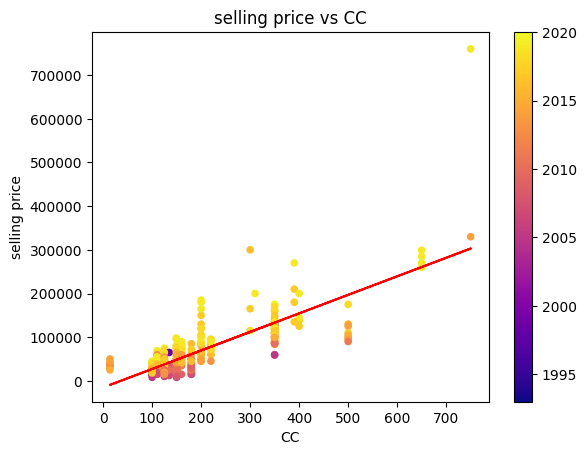

In [4]:
temp_df = df[df["CC"].notna()]

temp_df.plot.scatter(x='CC', y = 'selling_price', c=temp_df["year"], cmap=plt.cm.plasma)
plt.xlabel('CC')
plt.ylabel('selling price')
plt.title('selling price vs CC')

m, b = np.polyfit(temp_df["CC"], temp_df["selling_price"], 1)
plt.plot(temp_df["CC"], m*temp_df["CC"]+b, color="red")

correlation = temp_df["CC"].corr(temp_df["selling_price"])
print(f"Correlation between CC and Selling Price: {correlation:.3f}")

plt.show()

Correlation between CC and Selling Price for CC < 300: 0.506
Correlation between year and selling price for CC < 300: 0.616


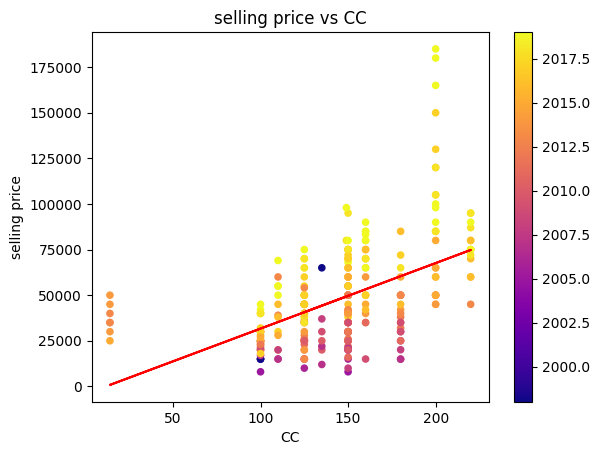

In [5]:
temp_df = df[df["CC"].notna()]
temp_df = temp_df[temp_df["CC"] < 300]
temp_df.plot.scatter(x='CC', y = 'selling_price', c=temp_df["year"], cmap=plt.cm.plasma)
plt.xlabel('CC')
plt.ylabel('selling price')
plt.title('selling price vs CC')

m, b = np.polyfit(temp_df["CC"], temp_df["selling_price"], 1)
plt.plot(temp_df["CC"], m*temp_df["CC"]+b, color="red")

correlation = temp_df["CC"].corr(temp_df["selling_price"])
print(f"Correlation between CC and Selling Price for CC < 300: {correlation:.3f}")

correlation = temp_df["year"].corr(temp_df["selling_price"])
print(f"Correlation between year and selling price for CC < 300: {correlation:.3f}")

plt.show()

In [6]:
correlation = df["year"].corr(df["selling_price"])
print(f"Correlation between year and selling price: {correlation:.3f}")

Correlation between year and selling price: 0.402


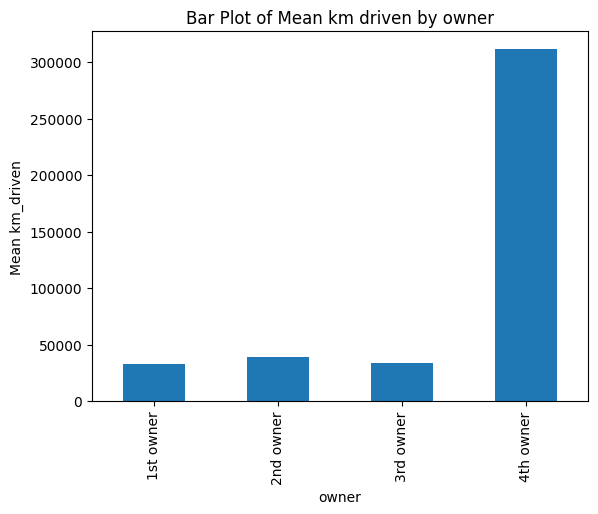

In [7]:
grouped_data = df.groupby('owner')['km_driven'].mean()

grouped_data.plot.bar()
plt.xlabel('owner')
plt.ylabel('Mean km_driven')
plt.title('Bar Plot of Mean km driven by owner')
plt.show()

In [8]:
print(df[df["owner"] == "4th owner"])

                           name  selling_price  year seller_type      owner  \
311  Harley-Davidson Street 750         330000  2014  Individual  4th owner   
642          TVS Apache RTR 160          15000  2009  Individual  4th owner   
698              Hero Honda CBZ          10000  2000  Individual  4th owner   

     km_driven  ex_showroom_price    CC  
311       6500           534000.0   750  
642     880000                NaN   160  
698      48000                NaN  <NA>  


In [9]:
df.drop(642, inplace=True)

print(df[df["owner"] == "4th owner"])

                           name  selling_price  year seller_type      owner  \
311  Harley-Davidson Street 750         330000  2014  Individual  4th owner   
698              Hero Honda CBZ          10000  2000  Individual  4th owner   

     km_driven  ex_showroom_price    CC  
311       6500           534000.0   750  
698      48000                NaN  <NA>  


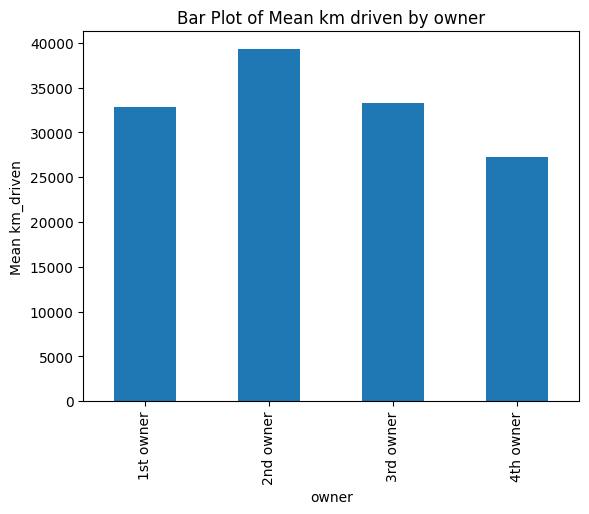

In [10]:
grouped_data = df.groupby('owner')['km_driven'].mean()

grouped_data.plot.bar()
plt.xlabel('owner')
plt.ylabel('Mean km_driven')
plt.title('Bar Plot of Mean km driven by owner')
plt.show()

In [11]:
grouped_data = [group['km_driven'].values for name, group in df.groupby('owner')]
print(stats.f_oneway(*grouped_data).pvalue)

0.5085253640620842
